In [1]:
import cirq
import random
import matplotlib.pyplot as plt
import numpy as np
from cirq.contrib.svg import SVGCircuit, circuit_to_svg

In [2]:
#Quantum fourier transform circuit
def make_qft(q):
    """Generator for the QFT on a list of qubits.

    For four qubits, the answer is:

                          ┌───────┐   ┌────────────┐   ┌───────┐
    0: ───H───@────────@───────────@───────────────────────────────────────
              │        │           │
    1: ───────@^0.5────┼─────H─────┼──────@─────────@──────────────────────
                       │           │      │         │
    2: ────────────────@^0.25──────┼──────@^0.5─────┼─────H────@───────────
                                   │                │          │
    3: ────────────────────────────@^(1/8)──────────@^0.25─────@^0.5───H───
                      └───────┘   └────────────┘   └───────┘
    """
    
    #Qubits are in reverse order from start
    
    for x in range(len(q)):
        yield cirq.H(q[x])
        for y in range(len(q) - x - 1):#add cz power gates connecting this qubit to each of lower ones
            exp = .5 ** (y + 1) #the gate powers are exponents of 1/2
            yield cirq.CZ(q[y + x + 1],q[x]) ** exp #act on head qubit with cz from lower qubits

In [3]:
def make_qft_inverse(q):
    for x in range(len(q)):
        yield cirq.H(q[x])
        #add cz power gates connecting this qubit to each of lower ones
        for y in range(len(q) - x - 1):
            exp = -1 * .5 ** (y + 1) #the gate powers are exponents of 1/2 (negative for inv)
            yield cirq.CZ(q[y + x + 1],q[x]) ** exp

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


                   ┌────────┐   ┌──────────────┐   ┌────────┐
0: ───H───@─────────@────────────@───────────────────────────────────────────
          │         │            │
1: ───────@^-0.5────┼──────H─────┼───────@──────────@────────────────────────
                    │            │       │          │
2: ─────────────────@^-0.25──────┼───────@^-0.5─────┼──────H────@────────────
                                 │                  │           │
3: ──────────────────────────────@^(-1/8)───────────@^-0.25─────@^-0.5───H───
                   └────────┘   └──────────────┘   └────────┘


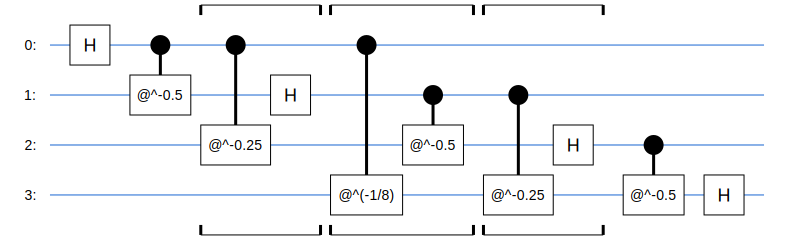

In [4]:
qbit = cirq.LineQubit.range(4)
qft = cirq.Circuit(make_qft_inverse(qbit))
print(qft)
SVGCircuit(qft)